In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('penaldf_geo.xlsx')

In [4]:
# convierto 'unknown' en NaN para contabilizar
import itertools as it
for i, col in it.product(df.index,df.columns):
    if df.at[i,col] == 'unknown':
        df.at[i,col] = np.nan

In [5]:
# Mapa de barrios de BA Data, lo llevo a geodf
import geopandas as gpd
map_df = gpd.read_file('barrios.csv')

# Polígono de CABA
from shapely.ops import unary_union
polygons = [map_df.at[i,'geometry'] for i in range(map_df.shape[0])]
# buffer corrige geometría
caba_polygon = unary_union(polygons).buffer(10**(-12)).buffer(-10**(-12))

In [6]:
# Creamos polígonos de las Comunas 
# con la función unary union de Shapely
comunas = map_df.comuna.unique()
comunas_geometry = []
for comuna in comunas:
    barrios = [map_df.at[i,'geometry'] for i in range(map_df.shape[0]) if map_df.at[i,'comuna'] == comuna]
    geometry = unary_union(barrios)
    comunas_geometry.append(geometry)

comunas_df = gpd.GeoDataFrame()
comunas_df['Comuna'] = comunas
comunas_df['geometry'] = comunas_geometry
# Corrijo geometría
comunas_df['geometry'] = comunas_df['geometry'].map(lambda x:x.buffer(10**(-12)).buffer(-10**(-12)))
comunas_df['Comuna'] = comunas_df['Comuna'].apply(pd.to_numeric)
comunas_df = comunas_df.sort_values(by='Comuna')
comunas_df.head()

,Comuna,geometry
6,1,"POLYGON ((-58.39239 -34.60316, -58.39257 -34.6..."
14,2,"POLYGON ((-58.41566 -34.59786, -58.41569 -34.5..."
7,3,"POLYGON ((-58.41356 -34.61237, -58.41401 -34.6..."
8,4,"POLYGON ((-58.43354 -34.64562, -58.43348 -34.6..."
2,5,"POLYGON ((-58.43233 -34.60393, -58.43333 -34.6..."


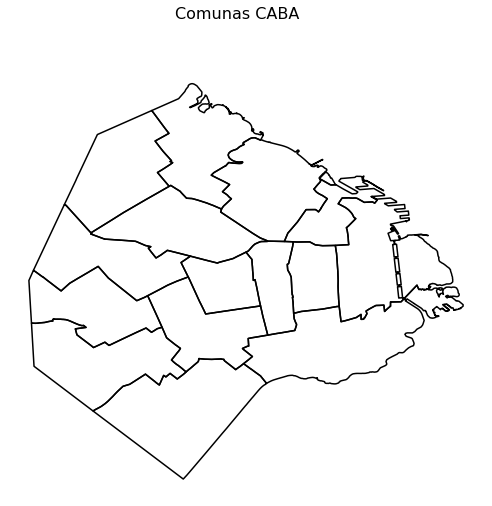

In [9]:
fig, ax = plt.subplots(1, figsize=(10, 8))
comunas_df.boundary.plot(ax=ax,edgecolor='0',)
ax.axis('off')
fig.suptitle('Comunas CABA',fontsize=16)
plt.show()

In [15]:
df.at[0,'exp_fechecho'].dtype()

AttributeError: 'str' object has no attribute 'dtype'